# IRIS DATASET

WAP in python to calculate gini index for iris dataset

In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df=pd.read_csv("Iris.csv")

In [8]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
x = df.drop(['Species', 'Id'], axis=1)

In [10]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y = df['Species']

In [13]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [14]:
# if we donot specify attribute selection measure, the by-default atrribute selection measure is gini index.
model = DecisionTreeClassifier(criterion='gini')

In [15]:
model

DecisionTreeClassifier()

In [16]:
#initialeze a dictionary to hold gini impurities for each feature
gini_impurities = {}

In [17]:
x.shape

(150, 4)

In [18]:
x.shape[1]

4

not part of decision tree algorithm

---

In [27]:
import numpy as np
#original array
arr=np.array([1,2,3,4,5,6])
print("Original array shape: ",arr.shape)

#reshape array
reshaped_arr=arr.reshape(-1,1)
print("Reshaped array shape: ",reshaped_arr.shape)
print("Reshaped array:\n", reshaped_arr)

reshaped_arr2=arr.reshape(2,3)
print("Reshaped array shape: ",reshaped_arr2.shape)
print("Reshaped array:\n", reshaped_arr2)

reshaped_arr3=arr.reshape(3,2)
print("Reshaped array shape: ",reshaped_arr3.shape)
print("Reshaped array:\n", reshaped_arr3)

#reshape command in numpy is used to reshape our numpy array
#when we reshape the array the number of rows and column shall be a factor of total number of elements present in the array

Original array shape:  (6,)
Reshaped array shape:  (6, 1)
Reshaped array:
 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
Reshaped array shape:  (2, 3)
Reshaped array:
 [[1 2 3]
 [4 5 6]]
Reshaped array shape:  (3, 2)
Reshaped array:
 [[1 2]
 [3 4]
 [5 6]]


In [29]:
reshaped_arr2[:,0]

array([1, 4])

In [30]:
reshaped_arr2[1:]

array([[4, 5, 6]])

In [35]:
reshaped_arr2[2:,2]

array([], dtype=int64)

----

In [39]:
#loop through each feature
for i in range(x.shape[1]):
    #fit classifier with only the current feature
    model=model.fit(x.iloc[:, i].values.reshape(-1, 1), y)
    prob=model.predict_proba(x.iloc[:, i].values.reshape(-1,1))
    gini_impurities[i] = 1 - (prob[:, 0]**2 + prob[:, 1]**2 + prob[:, 2]**2).sum()

In [40]:
#find the feature with the lowest gini impurity
best_feature = min(gini_impurities, key=gini_impurities.get)
print(f"Best feature: {best_feature}")

Best feature: 2


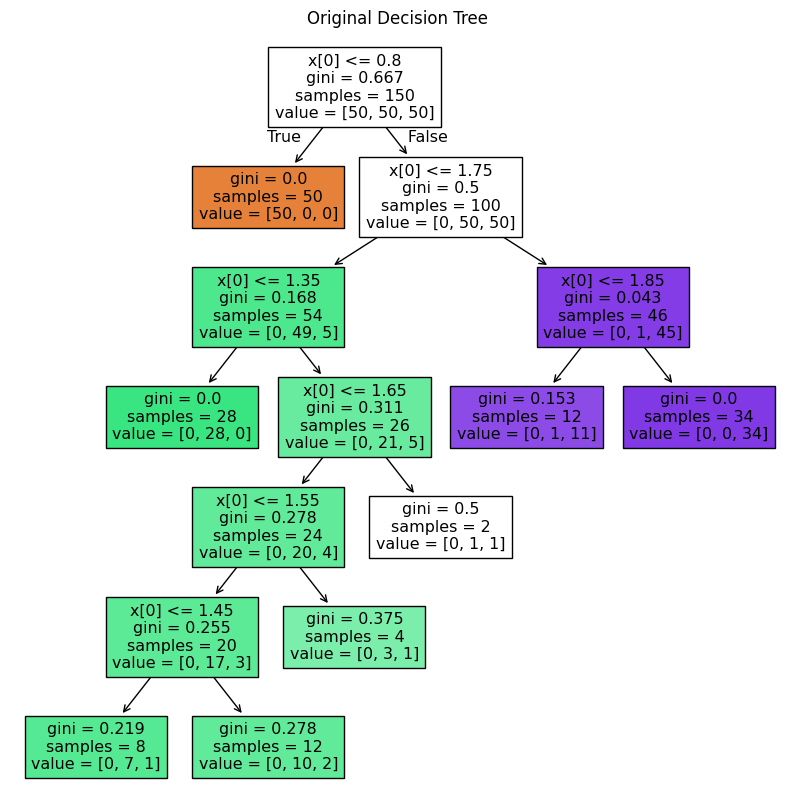

In [48]:
#plot original tree
plt.figure(figsize=(10, 10))
plot_tree(model, filled=True)
plt.title("Original Decision Tree")
plt.show()